# Suport Vector Machines

Una máquina de vectores de soporte se introdujo por primera vez en la década de 1960 y luego se improvisó en la década de 1990. Es un algoritmo de clasificación de aprendizaje automático supervisado que se ha vuelto extremadamente popular en la actualidad debido a sus resultados extremadamente eficientes.

Una máquina de vectores de soporte se implementa de una manera ligeramente diferente a otros algoritmos de aprendizaje automático. Es capaz de realizar clasificación, regresión y detección de valores atípicos.

La máquina de vectores de soporte es un clasificador discriminativo que está diseñado formalmente por un hiperplano separativo. Es una representación de ejemplos como puntos en el espacio que se mapean de modo que los puntos de diferentes categorías estén separados por un espacio lo más amplio posible. Además de esto, una máquina de vectores de soporte también puede realizar una clasificación no lineal. Echemos un vistazo a cómo funciona la máquina de vectores de soporte.

## Ventajas de SVM
- Eficaz en espacios de alta dimensión
- Aún eficaz en casos en los que el número de dimensiones es mayor que el número de muestras
- Utiliza un subconjunto de puntos de entrenamiento en la función de decisión que la hace eficiente en términos de memoria
- Se pueden especificar diferentes funciones kernel para la función de decisión, lo que también la hace versátil
## Desventajas de SVM
- Si el número de características es mucho mayor que el número de muestras, es fundamental evitar el sobreajuste al elegir las funciones kernel y el término de regularización.
- Las SVM no proporcionan estimaciones de probabilidad directamente, estas se calculan utilizando una validación cruzada de cinco pasos.
## ¿Cómo funciona SVM?
El objetivo principal de una máquina de vectores de soporte es segregar los datos dados de la mejor manera posible. Cuando se realiza la segregación, la distancia entre los puntos más cercanos se conoce como margen. El enfoque es seleccionar un hiperplano con el máximo margen posible entre los vectores de soporte en los conjuntos de datos dados.

In [1]:
#datos
from sklearn import datasets
 
cancer_data = datasets.load_breast_cancer()
print(cancer_data.data[5])

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]


In [2]:
print(cancer_data.data.shape) 
#target set 
print(cancer_data.target)

(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 

In [3]:
#dividir datos
from sklearn.model_selection import train_test_split
 
cancer_data = datasets.load_breast_cancer()
 
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.4,random_state=109)

In [5]:
#modelo
from sklearn import svm
#create a classifier
cls = svm.SVC(kernel="linear")
#train the model
cls.fit(X_train,y_train)
#predict the response
pred = cls.predict(X_test)

In [6]:
#evaluacion
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred=pred))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred=pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred=pred))
print(metrics.classification_report(y_test, y_pred=pred))

acuracy: 0.9649122807017544
precision: 0.9642857142857143
recall 0.9782608695652174
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        90
           1       0.96      0.98      0.97       138

    accuracy                           0.96       228
   macro avg       0.97      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228



[0 1 2 ... 5 7 9]


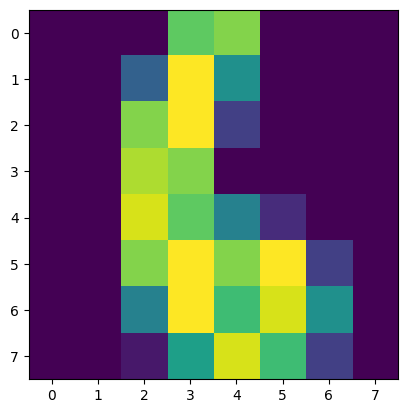

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
#loading the dataset
letters = datasets.load_digits()
#generating the classifier
clf = svm.SVC(gamma=0.001, C=100)
#training the classifier
X,y = letters.data[:-10], letters.target[:-10]
clf.fit(X,y)
#predicting the output 
print(clf.predict(letters.data[:-10]))
plt.imshow(letters.images[6], interpolation='nearest')
plt.show()